# Importing Necessary Libraries

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical, plot_model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# (1) Loading The Dataset

In [2]:
def load_dataset(dataset_path):
    images = []
    labels = []

    for label_folder in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label_folder)

        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            img = cv2.imread(image_path)

            images.append(img)
            labels.append(label_folder)

    return np.array(images, dtype=object), np.array(labels, dtype=object)

# (2) Preprocessing The Images

(2.1) Resizing

In [3]:
def resize_images(images_arr, new_Height, new_Width):
    resized_images =  np.array([cv2.resize(img, (new_Height, new_Width)) for img in images_arr])

    return resized_images

(2.2) Normalizing

In [4]:
def normalize_images(images_arr):
    normalized_images = np.array([img / 255.0 for img in images_arr])

    return normalized_images

In [5]:
def preprocess_images(images_arr):
    resized_images = resize_images(images_arr, 128, 128)
    normalized_images = normalize_images(resized_images)

    return normalized_images

# (3) Label Encoding

In [6]:
def label_encoding(data_labels):
    # ('glioma': 0 / 'meningioma': 1 / 'notumor': 2 / 'pituitary': 3)
    general_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

    new_data_labels = []
    for label in data_labels:
        new_data_labels.append(general_labels.index(label))

    return to_categorical(new_data_labels, num_classes=len(general_labels))

# (4) Model Design

In [7]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=4, activation='softmax'))

print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 64)        0         
                                                                 
 flatten (Flatten)           (None, 254016)            0         
                                                                 
 dense (Dense)               (None, 128)               32514176  
                                                      

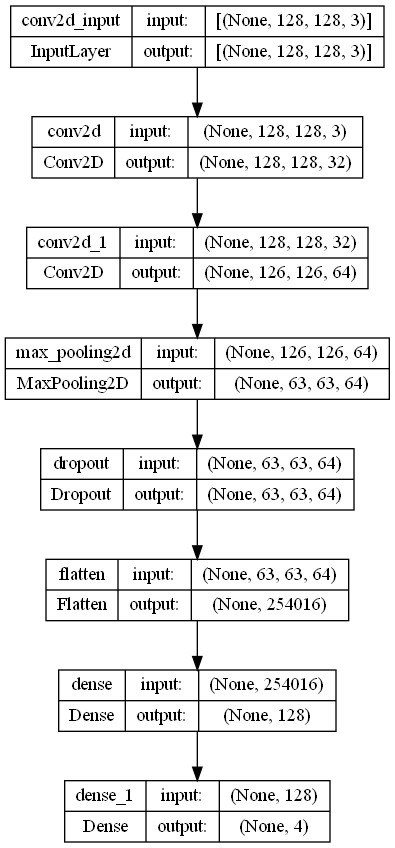

In [8]:
plot_model(model, show_shapes=True)

# Main Execution

In [9]:
brain_dataset_training_path = 'C:\\Users\\AORUS\\Desktop\\Brain Tumor Dataset\\Training'
train_images, train_labels = load_dataset(brain_dataset_training_path)
train_images = preprocess_images(train_images)

brain_dataset_testing_path = 'C:\\Users\\AORUS\\Desktop\\Brain Tumor Dataset\\Testing'
test_images, test_labels = load_dataset(brain_dataset_testing_path)
test_images = preprocess_images(test_images)

# Preview Samples after preprocessing

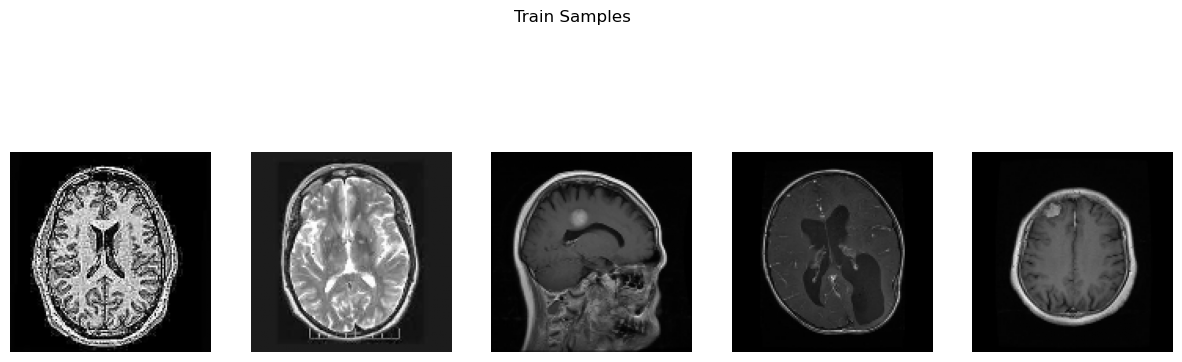

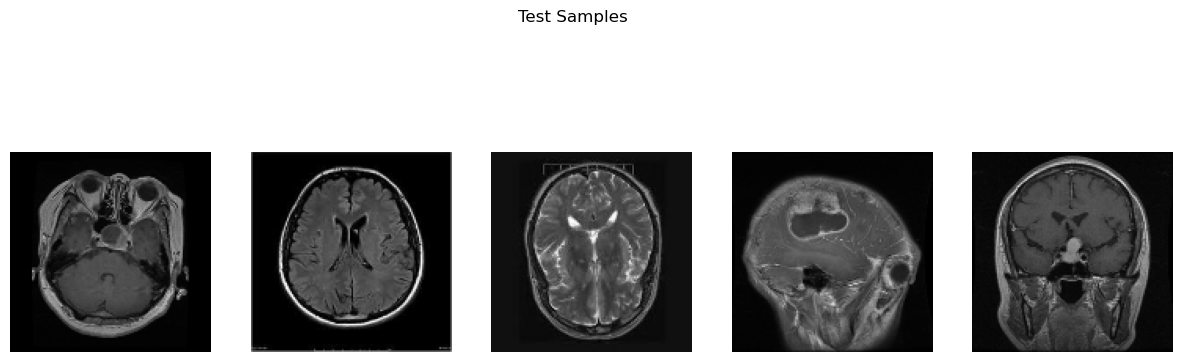

In [10]:
sample_size = 5
train_sample = train_images[np.random.choice(len(train_images), sample_size, replace=False)]
test_sample = test_images[np.random.choice(len(test_images), sample_size, replace=False)]

def plot_images(images, title):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()


plot_images(train_sample, 'Train Samples')
plot_images(test_sample, 'Test Samples')

In [11]:
encoded_train_labels = label_encoding(train_labels)

encoded_test_labels = label_encoding(test_labels)

In [12]:
print(f'Train images shape is : {train_images.shape}')
print(f'Train labels shape is : {train_labels.shape}')

print(f'Test images shape is : {test_images.shape}')
print(f'Test labels shape is : {test_labels.shape}')

Train images shape is : (5712, 128, 128, 3)
Train labels shape is : (5712,)
Test images shape is : (1311, 128, 128, 3)
Test labels shape is : (1311,)


# Model Training

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_images, encoded_train_labels, validation_split=0.2, batch_size=64, epochs=5, verbose=1)


Epoch 1/5


72/72 [==============================] - 89s 1s/step - loss: 1.0667 - accuracy: 0.6540 - val_loss: 1.9097 - val_accuracy: 0.2695
Epoch 2/5
72/72 [==============================] - 69s 950ms/step - loss: 0.2444 - accuracy: 0.9127 - val_loss: 2.5466 - val_accuracy: 0.2966
Epoch 3/5
72/72 [==============================] - 65s 899ms/step - loss: 0.1039 - accuracy: 0.9667 - val_loss: 3.4777 - val_accuracy: 0.3675
Epoch 4/5
72/72 [==============================] - 70s 979ms/step - loss: 0.0423 - accuracy: 0.9893 - val_loss: 4.1305 - val_accuracy: 0.3692
Epoch 5/5
72/72 [==============================] - 65s 904ms/step - loss: 0.0350 - accuracy: 0.9902 - val_loss: 5.1626 - val_accuracy: 0.3158


# Plotting Results

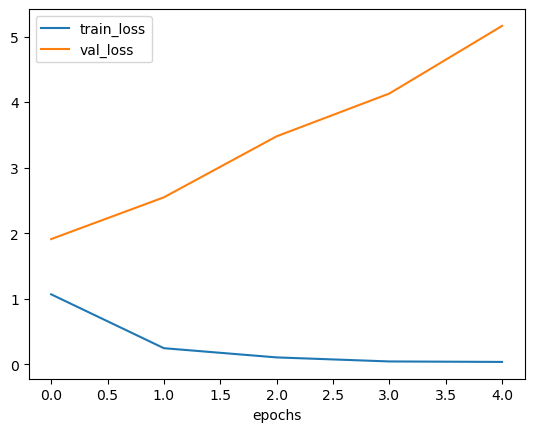

In [14]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('epochs')
plt.show()

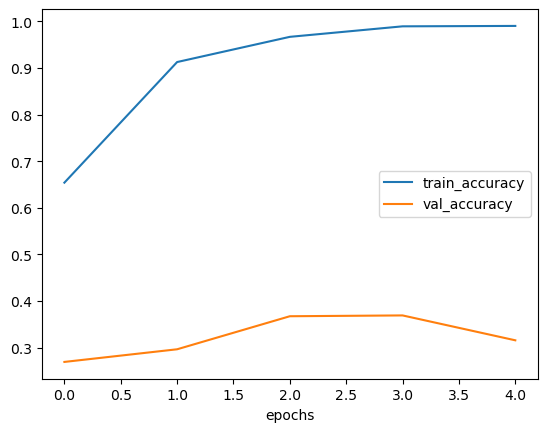

In [15]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('epochs')
plt.show()

# Model Evaluation

In [16]:
evaluation = model.evaluate(test_images, encoded_test_labels)

print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

41/41 [==============================] - 3s 63ms/step - loss: 1.4774 - accuracy: 0.7849
Test Loss: 1.4774117469787598
Test Accuracy: 0.7848970293998718
